In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
data=pd.read_csv("EmployeeAttrition(1).csv")

In [6]:
data.head()

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,High,2,1102,5993.0,8,8,6,4,0,5,0,Excellent,Yes
1,Below College,Medium,2,279,5130.0,1,10,10,7,1,7,3,Outstanding,No
2,College,Medium,1,1373,2090.0,6,7,0,0,0,0,3,Excellent,Yes
3,Master,High,1,1392,2909.0,1,8,8,7,3,0,3,Excellent,No
4,Below College,High,1,591,3468.0,9,6,2,2,2,2,3,Excellent,No


In [29]:
data.isnull().sum()

Education                  0
JobInvolvement             4
JobLevel                   0
DailyRate(USD)             0
MonthlyIncome(USD)         4
NoofCompaniesWorked        0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
TrainingTimesLastYear      0
PerformanceRating          0
Attrition                  0
dtype: int64

In [30]:
data.dropna(inplace=True)

In [31]:
data.isnull().sum()

Education                  0
JobInvolvement             0
JobLevel                   0
DailyRate(USD)             0
MonthlyIncome(USD)         0
NoofCompaniesWorked        0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
TrainingTimesLastYear      0
PerformanceRating          0
Attrition                  0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Education']=le.fit_transform(data['Education'])
data['JobInvolvement']=le.fit_transform(data['JobInvolvement'])
data['PerformanceRating']=le.fit_transform(data['PerformanceRating'])
data['Attrition']=le.fit_transform(data['Attrition'])


In [33]:
data.head()

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,2,0,2,1102,5993.0,8,8,6,4,0,5,0,0,1
1,1,2,2,279,5130.0,1,10,10,7,1,7,3,1,0
2,2,2,1,1373,2090.0,6,7,0,0,0,0,3,0,1
3,4,0,1,1392,2909.0,1,8,8,7,3,0,3,0,0
4,1,0,1,591,3468.0,9,6,2,2,2,2,3,0,0


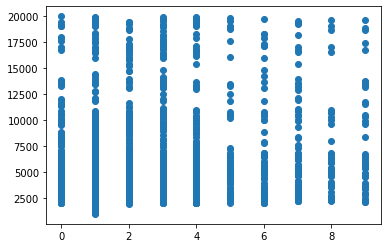

In [11]:
plt.scatter(data['NoofCompaniesWorked'],data['MonthlyIncome(USD)'])

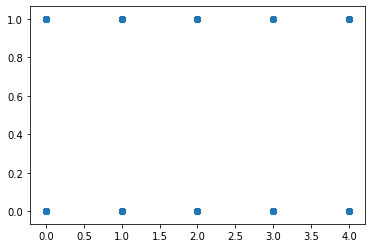

In [12]:
plt.scatter(data['Education'],data['Attrition'])

In [36]:
x=data.iloc[:,0:13]


In [37]:
x.head()

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating
0,2,0,2,1102,5993.0,8,8,6,4,0,5,0,0
1,1,2,2,279,5130.0,1,10,10,7,1,7,3,1
2,2,2,1,1373,2090.0,6,7,0,0,0,0,3,0
3,4,0,1,1392,2909.0,1,8,8,7,3,0,3,0
4,1,0,1,591,3468.0,9,6,2,2,2,2,3,0


In [38]:
y=data.iloc[:,[13]]

In [39]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [34]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


In [48]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x_train,y_train)
mi

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.        , 0.00594811, 0.01831414, 0.03331899, 0.04336656,
       0.00355884, 0.01804798, 0.02458918, 0.00382821, 0.0053701 ,
       0.01577575, 0.01748192, 0.        ])

In [49]:
MI=pd.Series(mi)
MI.index=x_train.columns
MI.sort_values(ascending=False)

MonthlyIncome(USD)         0.043367
DailyRate(USD)             0.033319
YearsAtCompany             0.024589
JobLevel                   0.018314
TotalWorkingYears          0.018048
TrainingTimesLastYear      0.017482
YearsWithCurrentManager    0.015776
JobInvolvement             0.005948
YearsSinceLastPromotion    0.005370
YearsInCurrentRole         0.003828
NoofCompaniesWorked        0.003559
PerformanceRating          0.000000
Education                  0.000000
dtype: float64

In [62]:

MI=pd.Series(mi)

In [63]:


MI.index=x.columns

In [66]:
MI.sort_values(ascending=False)

MonthlyIncome(USD)         0.043367
DailyRate(USD)             0.033319
YearsAtCompany             0.024589
JobLevel                   0.018314
TotalWorkingYears          0.018048
TrainingTimesLastYear      0.017482
YearsWithCurrentManager    0.015776
JobInvolvement             0.005948
YearsSinceLastPromotion    0.005370
YearsInCurrentRole         0.003828
NoofCompaniesWorked        0.003559
PerformanceRating          0.000000
Education                  0.000000
dtype: float64

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [56]:
y_test[:13]

,Attrition
1460,0
166,0
750,0
1112,1
38,0
768,0
1414,0
574,0
663,1
851,0


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.856655290102389

In [37]:
confusion_matrix(y_test,y_pred)

array([[247,   4],
       [ 38,   4]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       251
           1       0.50      0.10      0.16        42

    accuracy                           0.86       293
   macro avg       0.68      0.54      0.54       293
weighted avg       0.81      0.86      0.81       293



In [39]:

from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_test[:13]

,Attrition
1460,0
166,0
750,0
1112,1
38,0
768,0
1414,0
574,0
663,1
851,0


In [41]:
y_pred=logr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[250,  42],
       [  1,   0]], dtype=int64)

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       292
           1       0.00      0.00      0.00         1

    accuracy                           0.85       293
   macro avg       0.50      0.43      0.46       293
weighted avg       0.99      0.85      0.92       293



In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
y_pred=dtc.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [44]:
accuracy_score(y_pred,y_test)

0.7303754266211604

In [45]:
confusion_matrix(y_pred,y_test)

array([[202,  30],
       [ 49,  12]], dtype=int64)

In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       232
           1       0.29      0.20      0.23        61

    accuracy                           0.73       293
   macro avg       0.55      0.53      0.53       293
weighted avg       0.70      0.73      0.71       293



In [50]:
from sklearn.model_selection import GridSearchCV
grid_param={ 
    'criterion':['gini','entropy'],
    'max_depth' : [ 5,6,7] 
}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7]},
             pre_dispatch='2*

In [51]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [52]:
dtc_hyper=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc_hyper.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
y_pred_hyper=dtc_hyper.predict(x_test)
accuracy_score(y_test,y_pred_hyper)

0.8327645051194539

In [54]:
confusion_matrix(y_pred,y_test)

array([[202,  30],
       [ 49,  12]], dtype=int64)

In [55]:
confusion_matrix(y_pred_hyper,y_test)

array([[243,  41],
       [  8,   1]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 

In [68]:
svm = SVC() 
svm.fit(x_train, y_train) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
y_test[:13]

,Attrition
1460,0
166,0
750,0
1112,1
38,0
768,0
1414,0
574,0
663,1
851,0


In [70]:
y_pred=svm.predict(x_test)
y_pred[:13]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.856655290102389

In [72]:
y_pred_train=svm.predict(x_train)
accuracy_score(y_train,y_pred_train)

1.0

In [73]:
y_train_pred=svm.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 1, 1, 0])

In [74]:
accuracy_score(y_train,y_train_pred)

1.0

In [75]:
from collections import Counter as c
c(y_test)

Counter({'Attrition': 1})

In [76]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[251   0]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       251
           1       0.00      0.00      0.00        42

    accuracy                           0.86       293
   macro avg       0.43      0.50      0.46       293
weighted avg       0.73      0.86      0.79       293



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
